In [1]:
import mlpack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://matrix.org/_matrix/media/r0/download/matrix.org/WvrgbgzkyIMbvkxLkKKNyMrO/housing.csv

--2021-06-16 00:12:12--  https://matrix.org/_matrix/media/r0/download/matrix.org/WvrgbgzkyIMbvkxLkKKNyMrO/housing.csv
Resolving matrix.org (matrix.org)... 104.20.20.236, 104.20.21.236, 2606:4700:10::6814:14ec, ...
Connecting to matrix.org (matrix.org)|104.20.20.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/csv]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  3.60MB/s    in 0.4s    

2021-06-16 00:12:14 (3.60 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
dataset = pd.read_csv('housing.csv')

In [4]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


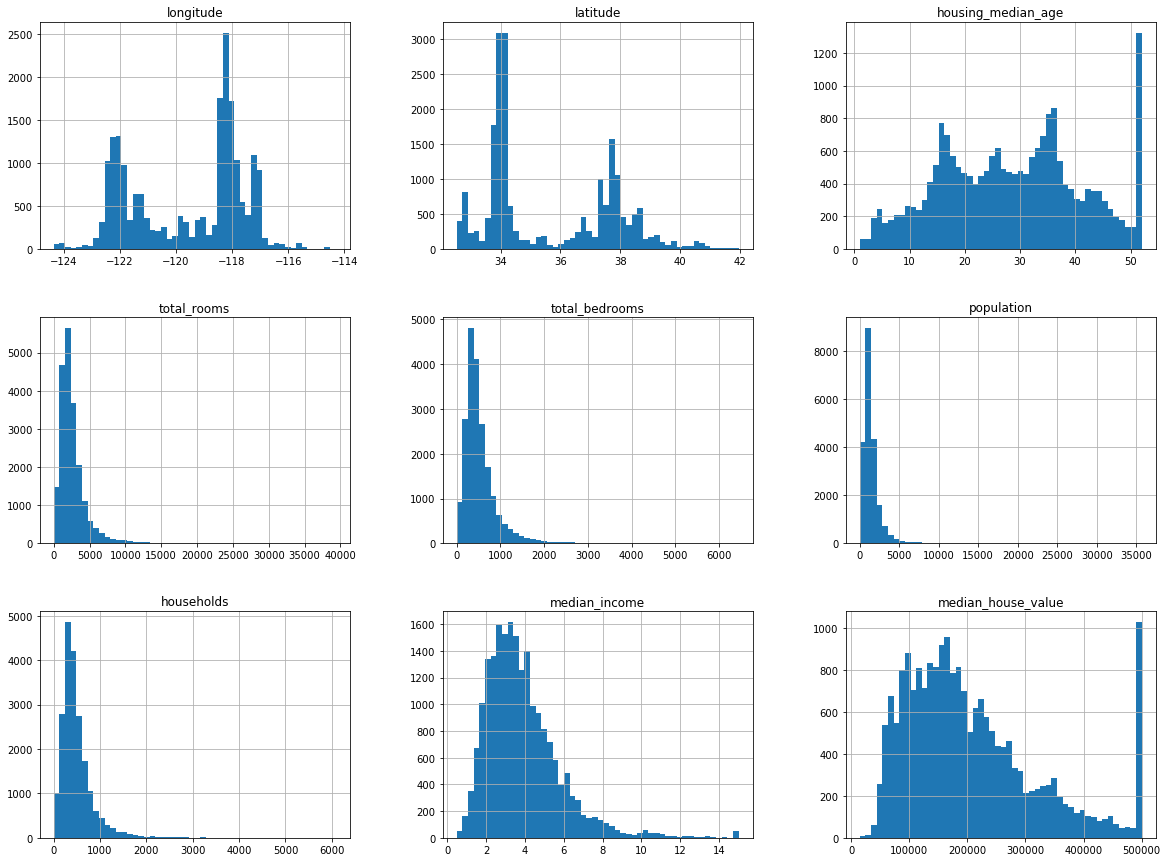

In [7]:
%matplotlib inline
dataset.hist(bins=50, figsize=(20,15))
plt.show()

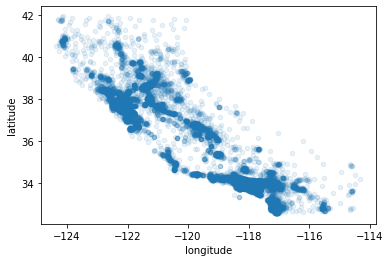

In [8]:
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)


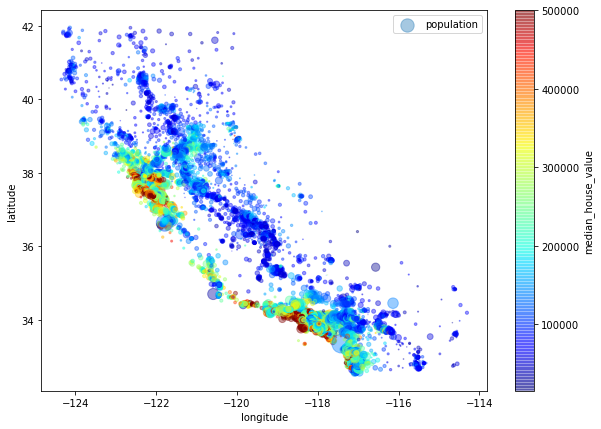

In [9]:
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=dataset["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

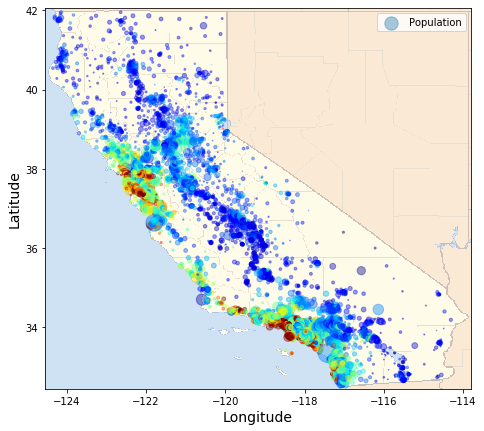

In [10]:
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png') #path to california image
ax = dataset.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=dataset['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

In [11]:
def one_hot_encoding(data, dimensions, drop= False):
  for dim in dimensions:
    if(type(data.iloc[:,dim].values[0]) == str):
      uniq = data.iloc[:,dim].unique()
      for val in uniq:
        data[f"{data.columns[dim]}_{val}"] = data.iloc[:,dim].apply(lambda x: 1 if x == val else 0)
      
  if drop:
    data.drop(data.columns[dimensions], axis = 1, inplace = True)

In [12]:
one_hot_encoding(data= dataset, dimensions=[9],drop=True)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_NEAR BAY    20640 non-null  int64  
 10  ocean_proximity_<1H OCEAN   20640 non-null  int64  
 11  ocean_proximity_INLAND      20640 non-null  int64  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  int64  
 13  ocean_proximity_ISLAND      206

In [14]:
dataset["rooms_per_household"] = dataset["total_rooms"]/dataset["households"]
dataset["bedrooms_per_room"] = dataset["total_bedrooms"]/dataset["total_rooms"]
dataset["population_per_household"]=dataset["population"]/dataset["households"]

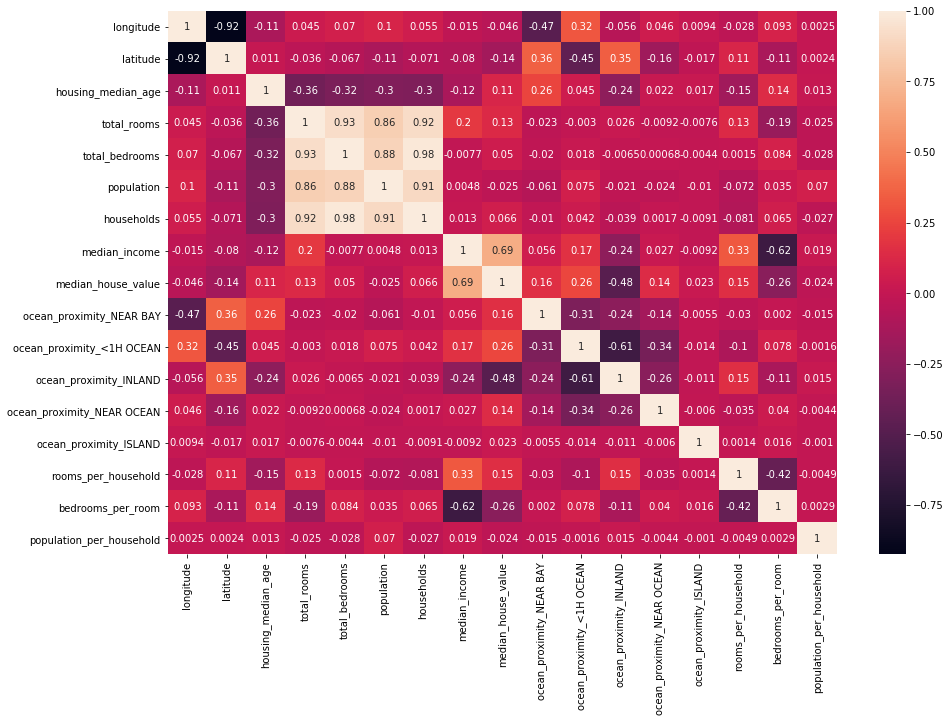

In [15]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [16]:
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(dataset, 0.2)

In [17]:
train_labels= train_set["median_house_value"]
train_set = train_set.drop("median_house_value", axis = 1)

In [18]:
test_labels = test_set["median_house_value"]
test_set = test_set.drop("median_house_value", axis = 1)

In [19]:
output = mlpack.linear_regression(training= train_set, training_responses = train_labels)

RuntimeError: solve(): solution not found